# Other Visualization Techniques

In this section, we will introduce other data visualizations that can be used to represent categorical or numerical data. We will discuss another visualization library called `seaborn`. While the `matplotlib` library can be used to create most data visualizations in Python, there are some restrictions when it comes to customization. The `seaborn` library provides many flexible options when creating visualizations. In the upcoming exercises, we will use a combination of `seaborn` and `matplotlib` to make visualizations, including box and whisker plots, heatmaps, and area plots.

Along with the previous data and libraries we have been using, we will import `seaborn` as a common convention: `sns`.

In [129]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('fast')

## Box and Whisker Plots

Box and whisker plots are a useful data visualization method because they intrinsically display multiple summary statistics simultaneously. The central line of each box within a box and whisker plot is the *median*. The median (also known as the second quartile, $Q_2$) is a value within a dataset that lies within the middle, separating the higher half and the lower half of the dataset. The median is a valuable measure of center for a dataset because it is not greatly affected by outliers, as opposed to the *mean*.

If *A* represents a dataset with the values listed below, the median of *A* can be determined by sorting the numbers from low to high and determining the value that falls into the middle (which in this case is 109):

<img align="center" src="./img/median(odd).png" width="60%"/>


In the case of a dataset with an even number of values, the median can be calculated as the mean of the middle two values, as shown in the example dataset *B* below:

<img align="center" src="./img/median(even).png" width="45%"/>


Box and whisker plots also show the *lower quartile*, *the upper quartile*, the *interquartile range*, *outliers*, the *minimum*, and the *maximum*. The lower quartile $\left( Q_1\right)$ is the value where the lowest 25% of the data points within a dataset lie. It is represented by the lower end of the box. 

On the other side, the upper quartile $\left( Q_3\right)$ is the value in which the highest 25% of the dataset resides. It is represented by the higher end of a box.


The interquartile range (IQR), is the difference between the upper quartile and the lower quartile. The IQR is used to make the length of a box and is represented by the equation:

  > $IQR=Q_3-Q_1$
    

Outliers are data points that are less than $Q_1-1.5×IQR$ or greater than $Q_3+1.5×IQR$. These data points are shown beyond the extremity of the whiskers.

Lastly, the minimum and maximum values are represented by the lowest and highest values, respectively, <b>that are within the range $Q_1-1.5×IQR$ and $Q_3+1.5×IQR$</b>. Essentially, they are the lowest and highest values that <u>do not</u> qualify as outliers. The lower whisker represents the minimum value, while the upper whisker represents the maximum value.

Below is a pictorial summary of the major components of a box and whisker plot with an accompanying set of numbers, *A*:

<img align="center" src="./img/BoxandWhisker.png" width="75%"/>

With the `military` data, we will use a box and whisker plot to examine the percentage GDP spending on the military for each country in the '60s as a way to examine multiple statistics for each country in this time period.

First, we extract the data of interest:

In [131]:
military = pd.read_csv("../../data/NorthAmerica_Military_USD-PercentGDP_Combined.csv", index_col='Year')

the60s = military.loc[1960:1969, ['CAN-PercentGDP', 'MEX-PercentGDP', 'USA-PercentGDP']]

the60s

,CAN-PercentGDP,MEX-PercentGDP,USA-PercentGDP
Year,,,
1960,4.185257,0.673509,8.993125
1961,4.128312,0.651780,9.156031
1962,3.999216,0.689655,9.331673
1963,3.620650,0.718686,8.831891
1964,3.402063,0.677507,8.051281
1965,2.930261,0.591270,7.587247
1966,2.683282,0.576379,8.435300
1967,2.747927,0.545217,9.417796
1968,2.543642,0.548511,9.268454


It is possible to make boxplots using using `pyplot` or the DataFrame method `plot.box()`, as shown below:

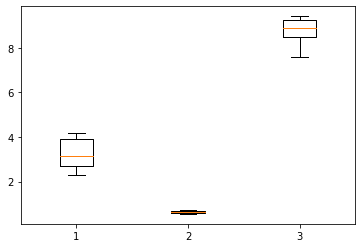

In [3]:
# Creates a boxplot using pyplot from matplotlib
plt.boxplot(the60s)
plt.show()

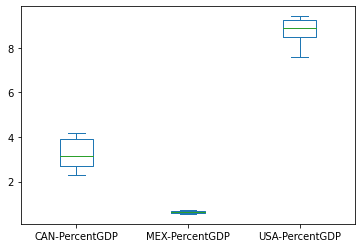

In [4]:
# Creates a boxplot using the DataFrame method plot.box()
the60s.plot.box()
plt.show()

Plotting using these approaches, the graphs show data within the columns of interest, but depending on the approach used, we see that the column title may or may not be used as categorical indicators on the x-axis. Furthermore, while these plots do the job of displaying the median and interquartile range, adding individual data points will allow for viewers to more easily see the spread of the data. The addition of axis labels, a title, and some color would also enhance this plot and make it more aesthetically pleasing. 

We can accomplish this using a combination of functions from `matplotlib` and `seaborn`. Using the `sns.boxplot()` and `sns.swarmplot()` functions will allow us to create a boxplot with data points overlayed on top:

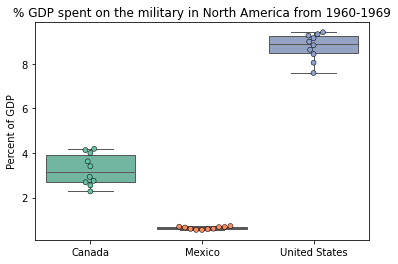

In [5]:
ax = sns.boxplot(data=the60s, palette="Set2", linewidth=1)
ax = sns.swarmplot(data=the60s, palette="Set2", linewidth=0.5, edgecolor = "black")
plt.xticks(ticks = [0,1,2], labels = ['Canada', 'Mexico', 'United States'])
plt.ylabel("Percent of GDP")
plt.title("% GDP spent on the military in North America from 1960-1969")


plt.show()

Now that we have proper labeling, we can see the median, upper quartile, and lower quartile of the percentage of the each country's GDP spent on the military from 1960 to 1969. A noticeable observation this plot shows is that Mexico not only spent a small percentage of their GDP on the military (less than 2%), but the percentage of spending during this decade had very little variability. This makes it hard to see what the median, upper quartile, and lower quartile are for Mexico. The issue of being able to visually resolve displays of data is a common one that data scientists encounter.

## Heatmaps

A heatmap is a matrix of data points depicted through a color gradient. Heatmaps are a great way to visualize data when you want to look at a multidimensional comparison of many variables. Heatmaps can be made from `matplotlib`, but this process may not be as straightforward to some. On the other hand, `seaborn` has a function dedicated to generations of heatmaps called `sns.heatmap()`. For your reference, both the `matplotlib` and `seaborn` approaches for constructing heatmaps are listed below.

With `seaborn`, we will use a heatmap to visualize variables that take on a large range of values. Using data from the Division of Vital Statistics at the Center for Disease Control (CDC), we will examine maternal mortality rates (MMR) in the United States from 2018 to 2019. This data displays the MMR per 100,000 live births based on race and Hispanic origin in various age groups. More information on the dataset can be found <a target="_blank" href="https://www.cdc.gov/nchs/data/hestat/maternal-mortality-2021/maternal-mortality-2021.htm">here</a>.

Let's load the data:

In [39]:
mmr = pd.read_csv("../../data/maternal-mortality-rate_2018-2019.csv", index_col='Race/Ethnicity: Age Group')

mmr

,MMR (2018),MMR (2019)
Race/Ethnicity: Age Group,,
Total: All Ages,17.4,20.1
Total: Under 25,10.6,12.6
Total: 25-39,16.6,19.9
Total: 40 and over,81.9,75.5
NHW: All Ages,14.9,17.9
NHW: Under 25,10.5,13.1
NHW: 25–39,13.8,16.8
NHW: 40 and over,72.0,75.2
NHB: All Ages,37.3,44.0


The `sns.heatmap()` function minimally requires an argument for the `data` parameter. We can specify this argument to be the DataFrame `mmr`:

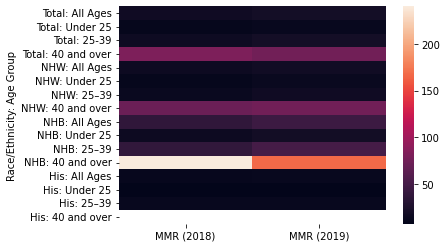

In [132]:
sns.heatmap(data = mmr)

plt.show()

Above we generated our heatmap based on our data, but there is room for improvement. The current colormap makes it difficult to see each individual race/ethnicity category. We can outline each individual data point using the `linewidth` and `linecolor` parameters. We'll also change the colormap from the default to something more visually distinguishable using the `cmap` parameter.

Furthermore, additional labeling would help in communicating what the data is about. A label for the color map bar can be added using the `cbar_kws` paramter and passing a dictionary as an argument. We will also add a title using `plt.title()`

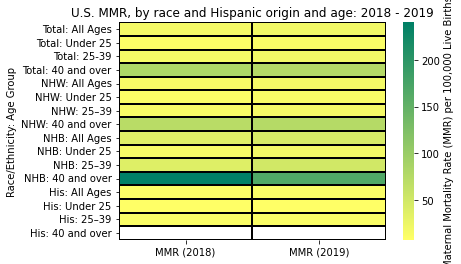

In [74]:
sns.heatmap(data = mmr, cmap='summer_r', linewidth=2, linecolor="black", # colormap, line width, and color specified
           cbar_kws={'label': 'Maternal Mortality Rate (MMR) per 100,000 Live Births'}) # color bar labeled
plt.title('U.S. MMR, by race and Hispanic origin and age: 2018 - 2019')           # title added

plt.show()

This is better, but it still can be improved! To make it easier to distinguish each row, we can change our figure size to be `plt.figure()`. We could also increase the space between the title and the heatmap using the `pad` parameter in `plt.title()`.

Additionally, labeling the values of each data point would aid a viewer in understanding the distribution of the dataset. By passing `True` into the `annot` parameter, we can label each data point with its respective value. We dictate the format of this labeling using the `fmt` parameter, following formatting for string literals. More information on that is referenced below.

Lastly, we can specify the minimum and maximum values of the color bar using `vmin` and `vmax`, respectively.

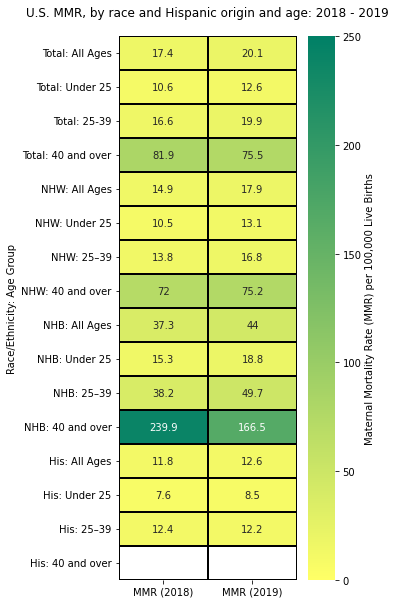

In [76]:
plt.figure(figsize=(4,10)) 

sns.heatmap(data = mmr, cmap='summer_r', linewidth=2, linecolor="black", # colormap, line width, and color specified
           cbar_kws={'label': 'Maternal Mortality Rate (MMR) per 100,000 Live Births'}, # color bar labeled
            vmin=0, vmax=250, annot=True, fmt='g')                  # min and max values set, annotate data points
plt.title('U.S. MMR, by race and Hispanic origin and age: 2018 - 2019', pad=20)     # title added, padding set

plt.show()

Above, we see the matrix of values of the MMR (per 100,000 live births) in the U.S. based on race and ethnicity and age group. Notice that in the Hispanic, 40 and over group (His: 40 and over), these data points appear white for 2018 and 2019 and are not labeled. These groups have NaN values in the `mmr` DataFrame because the MMR does not meet National Center for Health Statistics standards of reliability, and thus, did not have a recorded value in the original dataset.

## Area Plots

An area plot is a specialized line graph that can be used to show trends of multiple variables in a dataset over a period of time. In an area plot, data points over time are connected to create a trend line and the region formed under the line is filled with a solid color. A useful adaptation of an area plot is that it can be constructed in a way that shows a proportional relationship of each variable to all variables over time, which can be a great alternative to using multiple pie charts to examine temporal trends.

We will use an area plot to examine the proportion of suicides amongst youth ages 10-24 in east north central states from 2000-2018 using the `enc` dataset:

In [124]:
enc = pd.read_csv("../../data/east-north-central_suicides.csv", index_col='Year')
enc

,Illinois,Indiana,Michigan,Ohio,Wisconsin
Year,,,,,
2000,155,112,138,151,109
2001,172,98,143,165,100
2002,168,104,150,168,112
2003,131,80,132,139,103
2004,160,99,148,199,111
2005,139,114,140,187,104
2006,135,98,124,183,71
2007,173,104,138,178,110
2008,144,94,146,202,80


Now that we have this data, we can begin to calculate the proportion of suicides in each state for each year. 

Using the `.sum()` and `.div()` methods, we can determine the sum for each year, then divide each data point by this sum. In the `.sum()` method, we will use `axis=1` to sum over each row, which will allow us to determine the total for each year:

In [125]:
enc = enc.div(enc.sum(axis=1), axis=0)
enc

,Illinois,Indiana,Michigan,Ohio,Wisconsin
Year,,,,,
2000,0.233083,0.168421,0.207519,0.227068,0.163910
2001,0.253687,0.144543,0.210914,0.243363,0.147493
2002,0.239316,0.148148,0.213675,0.239316,0.159544
2003,0.223932,0.136752,0.225641,0.237607,0.176068
2004,0.223152,0.138075,0.206416,0.277545,0.154812
2005,0.203216,0.166667,0.204678,0.273392,0.152047
2006,0.220949,0.160393,0.202946,0.299509,0.116203
2007,0.246088,0.147937,0.196302,0.253201,0.156472
2008,0.216216,0.141141,0.219219,0.303303,0.120120


Now we can begin to make the area plot with the calculated proportions. To do these, we will use the `plt.stackplot()` function. This function first takes an array-like object for the x-values, followed by arrays of the y-values that are to be stacked.

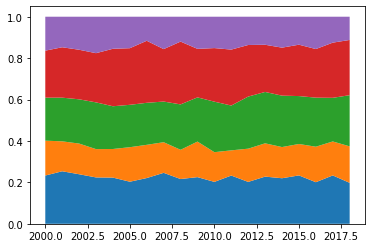

In [126]:
plt.stackplot(enc.index, enc['Illinois'], enc['Indiana'], enc['Michigan'], enc['Ohio'], enc['Wisconsin'])
plt.show()

Currently, we don't know what each color corresponds to, but this can be solved by specifying the `labels` parameter, which dictates how each y-value is to be labeled. By specifying this, the labels can then be visualized in the legend using `plt.legend()`. The location of the legend will be placed using the `bbox_to_anchor` parameter.

As an aesthetic feature, we can also make this graph so that it takes up the entire plotting area by using `plt.margins()`. This function accepts an x and y value, respectively, to indicate where the margins begin on each axis. To get rid of the margins, we will use 0 for each value. 

Like with previous visualizations, we can add a title and fix the x-axis ticks using `plt.title()` and `plt.xticks()`, respectively.

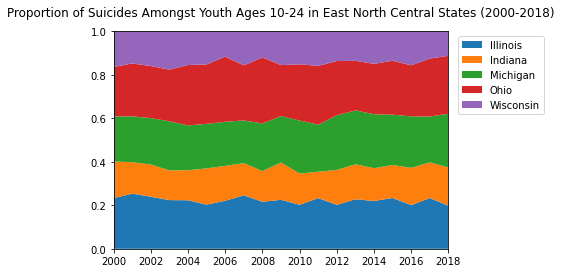

In [128]:
plt.stackplot(enc.index, enc['Illinois'], enc['Indiana'], enc['Michigan'], enc['Ohio'], enc['Wisconsin'], 
              labels = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'])
plt.legend(bbox_to_anchor = (1.3,1))
plt.margins(0,0)
plt.title('Proportion of Suicides Amongst Youth Ages 10-24 in East North Central States (2000-2018)', pad=15)

years = np.arange(2000, 2020, 2)
plt.xticks(years)

plt.show()

We can now see the changes in the youth suicides in north east central states from 2000-2018. We see how these trends flucuated in each state over time in each state.

## Conclusions

In this section, we were introduced to a new data visualization library: `seaborn`. The `seaborn` library can make many of the same visualizations available in `matplotlib` and can be used as an alternative in cases where more flexibility is needed. 

We learned how to make box and whisker plots and the multiple statistics that these plots innately show. Box and whisker plots can be made in both `matplotlib` and `seaborn`, but using `seaborn` to construct these plots allows for an easy way to overlay data points upon the box and whisker plot.

We also learned about heatmaps and their ability to show multidimensional data.

Lastly, we learned how to construct area plots as another way to show proportional trends overtime, combining benefits of both a line graph and pie chart.

Documentation to functions introduced in this section can be found below:


- <a target="_blank" href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">Seaborn documentation and user guide</a>
- <a target="_blank" href="https://seaborn.pydata.org/examples/index.html">Seaborn data visualization gallery</a>
- <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html">DataFrame.plot.box( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html">plt.boxplot( )</a>
- <a target="_blank" href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">sns.boxplot( )</a>
- <a target="_blank" href="https://seaborn.pydata.org/generated/seaborn.swarmplot.html">sns.swarmplot( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html">Heatmaps in Matplotlib</a>
- <a target="_blank" href="https://seaborn.pydata.org/examples/spreadsheet_heatmap.html">sns.heatmap( )</a>
- <a target="_blank" href="https://docs.python.org/3/library/string.html#format-specification-mini-language">Formatting string literals</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stackplot.html">plt.stackplot( )</a>
